# 小霞：sp計算方式

## 假設

寶可夢在同一個狀態下(不進化、進化1次、進化2次)，sp的function是一樣的。

## 模型

未進化前，抓5對同種、但不同等級的寶可夢(共10隻)，算sp的公式 -> 套用到新的5對同種、但不同等級的寶可夢(共10隻)，看Loss值多少。

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
import pandas as pd

In [ ]:
name,sp,level,help_fruit,num,help_ingredient_num_1,help_ingredient_num_2,help_ingredient_num_2,help_time,help_max,skill_main_level

In [3]:
# 引入資料1
import sqlite3

class same_pokemon():
    def __init__(self):
        self.conn = sqlite3.connect("pokemon_database.db")
        cursor = self.conn.cursor()
        cursor.execute('''
            SELECT * FROM pokemon
            '''
        )
        rows = cursor.fetchall()

        name = []
        sp = []
        level = []
        help_fruit_num = []
        help_ingredient_num_1 = []
        help_ingredient_num_2 = []
        help_ingredient_num_3 = []
        help_time = []
        help_max = []

        skill_main = []
        skill_main_num = []
        skill_main_level = []
        skill_second_1 = []
        skill_second_num_1 = []

        for row in rows:
            name.append(row[2])
            sp.append(row[3])
            level.append(row[5])
            help_fruit_num.append(row[7])
            help_ingredient_num_1.append(row[9])
            help_ingredient_num_2.append(row[11])
            help_ingredient_num_3.append(row[13])
            help_time.append(row[14])
            help_max.append(row[15])

            skill_main.append(row[16])
            skill_main_num.append(row[17])
            skill_main_level.append(row[18])
            skill_second_1.append(row[19])
            skill_second_num_1.append(row[20])

        # 將 Python 列表轉換為 NumPy 陣列
        self.a = np.array(name)
        self.b = np.array(sp)
        self.c = np.array(level)
        self.d = np.array(help_fruit_num)
        self.e = np.array(help_ingredient_num_1)
        self.f = np.array(help_ingredient_num_2)
        self.g = np.array(help_ingredient_num_3)
        self.h = np.array(help_time)
        self.i = np.array(help_max)

        self.j = np.array(skill_main)
        self.k = np.array(skill_main_num)
        self.l = np.array(skill_main_level)
        self.m = np.array(skill_second_1)
        self.n = np.array(skill_second_num_1)

    def get_data(self):
        return self.a, self.b, self.c, self.d, self.e, self.f, self.g, self.h, self.i,self.j,self.k,self.l,self.m,self.n

# 創建物件
pokemon_instance = same_pokemon()
name, sp ,level,help_fruit_num,help_ingredient_num_1,help_ingredient_num_2,help_ingredient_num_3,help_time,help_max,skill_main,skill_main_num,skill_main_level,skill_second_1,skill_second_num_1= pokemon_instance.get_data()

# 現在 name 和 sp 包含了從資料庫中擷取的資料
print("name:", name)
print("sp:", sp)
print("level:", level)
print("help_fruit_num:", help_fruit_num)
print("help_ingredient_num_1:", help_ingredient_num_1)
print("help_ingredient_num_2:", help_ingredient_num_2)
print("help_ingredient_num_3:", help_ingredient_num_3)
print("help_time:", help_time)
print("help_max:", help_max)

print("skill_main:", skill_main)
print("skill_main_num:", skill_main_num)
print("skill_main_level:", skill_main_level)
print("skill_second_1:", skill_second_1)
print("skill_second_num_1:", skill_second_num_1)

name: ['妙蛙種子' '妙蛙種子' '小火龍' '小火龍' '小火龍' '小火龍' '傑尼龜' '卡咪龜' '綠毛蟲' '鐵甲蛹' '鐵甲蛹' '巴大蝶'
 '小拉達' '小拉達' '拉達' '阿柏蛇' '阿柏蛇' '阿柏蛇' '阿柏蛇' '皮卡丘' '皮卡丘' '雷丘' '胖丁' '地鼠' '地鼠'
 '喵喵' '貓老大' '可達鴨' '猴怪' '猴怪' '卡蒂狗' '風速狗' '喇叭芽' '小拳石' '小拳石' '小拳石' '小拳石'
 '呆呆獸' '呆殼獸' '小磁怪' '嘟嘟' '嘟嘟利' '鬼斯' '鬼斯' '鬼斯通' '鬼斯通' '卡拉卡拉' '嘎啦嘎啦' '伊布'
 '伊布' '菊草葉' '小鉅鱷' '皮丘' '皮丘' '寶寶丁' '寶寶丁' '寶寶丁' '波克比' '波克比' '波客基古' '茸茸羊'
 '樹才怪' '戴魯比' '戴魯比' '戴魯比' '幼基拉斯' '幼基拉斯' '沙基拉斯' '懶人獺' '懶人獺' '溶食獸' '清綿鳥'
 '怨影娃娃' '怨影娃娃' '小果然' '海豹球' '海豹球' '盆才怪' '盆才怪' '盆才怪' '魔尼尼' '利歐路' '利歐路' '不良蛙'
 '不良蛙']
sp: [ 388  460  409  409  421  404  364  690  308  519  451  872  317  335
  611  459  346  445  452  654  565  849  732  359  345  332  627  369
  383  444  411 1088  379  442  332  351  330  352  649  381  358  779
  388  399  606  571  497  680  466  475  536  558  318  344  279  307
  387  291  321  693  487  591  390  411  390  356  446  613  322  386
  371  415  394  401  408  332  366  324  300   10  375  313  363  313
  434]
level: [ 5 10  7  7  8  8  4 13  4 11 10 12

In [6]:
#引入資料2
import sqlite3

class SamePokemon:
    def __init__(self):
        self.conn = sqlite3.connect("pokemon_database.db")
        cursor = self.conn.cursor()
        cursor.execute('SELECT * FROM pokemon')
        self.rows = cursor.fetchall()

        self.columns = {
            'name': 2,
            'sp': 3,
            'level': 5,
            'help_fruit_num': 7,
            'help_ingredient_num_1': 9,
            'help_ingredient_num_2': 11,
            'help_ingredient_num_3': 13,
            'help_time': 14,
            'help_max': 15,
            'skill_main': 16,
            'skill_main_num': 17,
            'skill_main_level': 18,
            'skill_second_1': 19,
            'skill_second_num_1': 20,
            'skill_second_2':21,
            'skill_second_num_2':22,
            'skill_second_3':23,
            'skill_second_num_3':24,
            'skill_second_4':25,
            'skill_second_num_4':26,
            'skill_second_5':27,
            'skill_second_num_5':28,
            'power_up':29,
            'power_down':30
        }

    def get_data(self):
        return {key: [row[idx] for row in self.rows] for key, idx in self.columns.items()}

pokemon_instance = SamePokemon()
data = pokemon_instance.get_data()

for key, values in data.items():
    print(key + ":", values)


name: ['妙蛙種子', '妙蛙種子', '小火龍', '小火龍', '小火龍', '小火龍', '傑尼龜', '卡咪龜', '綠毛蟲', '鐵甲蛹', '鐵甲蛹', '巴大蝶', '小拉達', '小拉達', '拉達', '阿柏蛇', '阿柏蛇', '阿柏蛇', '阿柏蛇', '皮卡丘', '皮卡丘', '雷丘', '胖丁', '地鼠', '地鼠', '喵喵', '貓老大', '可達鴨', '猴怪', '猴怪', '卡蒂狗', '風速狗', '喇叭芽', '小拳石', '小拳石', '小拳石', '小拳石', '呆呆獸', '呆殼獸', '小磁怪', '嘟嘟', '嘟嘟利', '鬼斯', '鬼斯', '鬼斯通', '鬼斯通', '卡拉卡拉', '嘎啦嘎啦', '伊布', '伊布', '菊草葉', '小鉅鱷', '皮丘', '皮丘', '寶寶丁', '寶寶丁', '寶寶丁', '波克比', '波克比', '波客基古', '茸茸羊', '樹才怪', '戴魯比', '戴魯比', '戴魯比', '幼基拉斯', '幼基拉斯', '沙基拉斯', '懶人獺', '懶人獺', '溶食獸', '清綿鳥', '怨影娃娃', '怨影娃娃', '小果然', '海豹球', '海豹球', '盆才怪', '盆才怪', '盆才怪', '魔尼尼', '利歐路', '利歐路', '不良蛙', '不良蛙']
sp: [388, 460, 409, 409, 421, 404, 364, 690, 308, 519, 451, 872, 317, 335, 611, 459, 346, 445, 452, 654, 565, 849, 732, 359, 345, 332, 627, 369, 383, 444, 411, 1088, 379, 442, 332, 351, 330, 352, 649, 381, 358, 779, 388, 399, 606, 571, 497, 680, 466, 475, 536, 558, 318, 344, 279, 307, 387, 291, 321, 693, 487, 591, 390, 411, 390, 356, 446, 613, 322, 386, 371, 415, 394, 401, 408, 332, 366, 324, 300, 10

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([sp[0], level[0], help_fruit_num[0], help_ingredient_num_1[0], help_ingredient_num_2[0], help_ingredient_num_3[0], help_max[0]], dtype=np.str)
y = np.array([sp[1], level[1], help_fruit_num[1], help_ingredient_num_1[1], help_ingredient_num_2[1], help_ingredient_num_3[1], help_max[1]])

# 將 x 重塑為具有一行和多列的 2D 陣列
x_reshaped = x.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(x_reshaped, y)


C:\Users\user\AppData\Local\Temp\ipykernel_1316\2851115108.py:4: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  x = np.array([sp[0], level[0], help_fruit_num[0], help_ingredient_num_1[0], help_ingredient_num_2[0], help_ingredient_num_3[0], help_max[0]], dtype=np.str)


AttributeError: module 'numpy' has no attribute 'str'.
`np.str` was a deprecated alias for the builtin `str`. To avoid this error in existing code, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [42]:
x=np.array([sp[0],level[0],help_fruit_num[0],help_ingredient_num_1[0],help_ingredient_num_2[0],help_ingredient_num_3[0],help_max[0]])
y=np.array([sp[1],level[1],help_fruit_num[1],help_ingredient_num_1[1],help_ingredient_num_2[1],help_ingredient_num_3[1],help_max[1]])
print(x)
print(y)


[388   5   1   2   4   7  11]
[460  10   1   2   5   6  11]


In [36]:
X=x.reshape(-1,1)
Y=y.reshape(-1,1)


array([[388],
       [  5],
       [  1],
       [  2],
       [  4],
       [  7],
       [ 11]])

In [37]:
linreg.fit(x,y)


ValueError: Expected 2D array, got 1D array instead:
array=[388   5   1   2   4   7  11].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_predict=linreg.predict(a)
plt.scatter(A,b)
plt.plot(A,y_predict,'Red')
plt.show()

# 老子不引入了，我先跑函式

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [63]:
x=np.array([5,1,2,4,7,11])
y=np.array([10,1,2,5,6,11])
z=np.array([])

In [65]:
linreg=LinearRegression()
linreg

LinearRegression()

LinearRegression()

In [68]:
X=x.reshape(-1,1)
X

array([[ 5],
       [ 1],
       [ 2],
       [ 4],
       [ 7],
       [11]])

In [69]:
linreg.fit(X,y)

LinearRegression()

In [70]:
y_predict=linreg.predict(X)

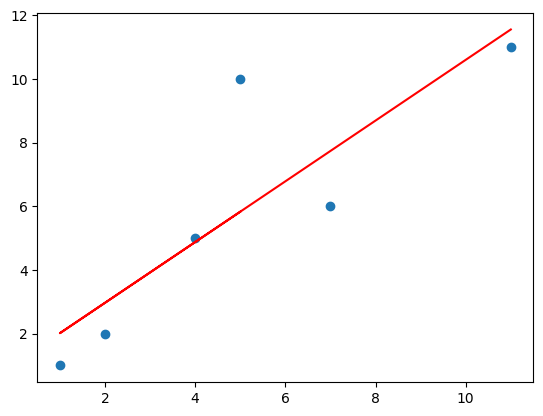

In [71]:
plt.scatter(X,y)
plt.plot(X,y_predict,'Red')
plt.show()

In [ ]:
# 3D的
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='petal_length', size='petal_length', size_max=18,
              symbol='species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()